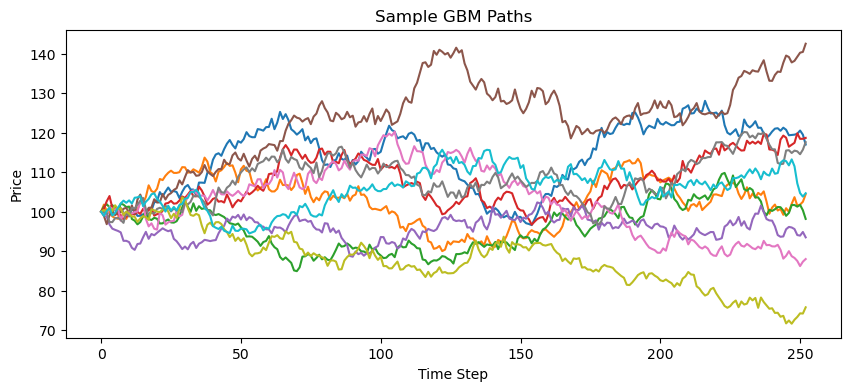

Monte Carlo European Call Price (GBM): 10.3398
Black-Scholes Price: 10.4506


In [2]:
# Option Pricing via Monte Carlo Simulation
# Author: James Liu
# Goal: Understand institutional option pricing from end to end, with comments on industry practices

# --- Setup ---
import numpy as np
import matplotlib.pyplot as plt
from models.black_scholes import black_scholes_price
from models.monte_carlo import generate_gbm_paths, generate_heston_paths
from models.payoff import european_call_payoff

# --- Parameters ---
S0 = 100        # initial stock price
K = 100         # strike price
T = 1.0         # time to maturity (in years)
r = 0.05        # risk-free rate
sigma = 0.2     # volatility
n_paths = 10000
n_steps = 252

# --- Generate GBM Paths ---
gbm_paths = generate_gbm_paths(S0, r, sigma, T, n_steps, n_paths)

# --- Plot Sample Paths ---
plt.figure(figsize=(10, 4))
plt.plot(gbm_paths[:, :10])
plt.title("Sample GBM Paths")
plt.xlabel("Time Step")
plt.ylabel("Price")
plt.show()

# --- Calculate Monte Carlo Price ---
terminal_prices = gbm_paths[-1]
payoffs = european_call_payoff(terminal_prices, K)
mc_price = np.exp(-r * T) * np.mean(payoffs)
print(f"Monte Carlo European Call Price (GBM): {mc_price:.4f}")

# --- Compare with Black-Scholes ---
bs_price = black_scholes_price(S0, K, T, r, sigma, option_type="call")
print(f"Black-Scholes Price: {bs_price:.4f}")

# --- Industry Note ---
# Traders use GBM as a starting point. For smile/skew, they use stochastic volatility models like Heston.
# We'll now implement a simplified Heston model for realism.

# --- Optional: Generate Heston Paths ---
# heston_paths = generate_heston_paths(S0, T, r, v0=0.04, kappa=1.5, theta=0.04, sigma_v=0.3, rho=-0.7, steps=n_steps, n_paths=n_paths)
# heston_prices = heston_paths[-1]
# heston_payoffs = european_call_payoff(heston_prices, K)
# heston_mc_price = np.exp(-r * T) * np.mean(heston_payoffs)
# print(f"Monte Carlo Price (Heston): {heston_mc_price:.4f}")

# --- Next: Extend to other exotic options like Asian, Barrier, Digital ---
